<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Вывод</a></span></li></ul></div>

# Отток клиентов

https://github.com/AlexeyGankov/YP_ml_with_teacherИз «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("/datasets/Churn.csv")

In [127]:
#для локальной работы
#df = pd.read_csv("Churn.csv")

In [29]:
print(df.info())
display(df.head())

display(df.tail())
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB
None


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,NaN,130142.79,1,1,0,38190.78,0


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


**Данные выглядят адекватно (то есть загрузка файла прошла успешна). Теперь можно провести первичный анализ**

**Необходимо обработать столбцы Geogrpahy и Gender по методике OHE. Остальные столбцы имеют праивльные тип для обучени модели (численный). И убрать заведомо не значащие столбцы(*). Также столбец Tenure требует обработки, тк содержит значения NaN. Сперва посмотрим содержимое этих столбцов** 

In [30]:
print(df.Geography.unique())
print(df.Gender.unique())
print(df.Tenure.unique())

['France' 'Spain' 'Germany']
['Female' 'Male']
[ 2.  1.  8.  7.  4.  6.  3. 10.  5.  9.  0. nan]


**Проводим кодирование, убирая избыточный столец, чтобы избежат мультиколлинеарности.**

In [31]:
df_country = pd.get_dummies(df.Geography, drop_first=True)
df_gender = pd.get_dummies(df.Gender, drop_first=True)

**Формируем готовый датасет фич, удалив ненужные столбцы. Для столбца tenure заполняем ячейки NaN медианным значением по имеющимся значениям в столбце.**

In [32]:
df_features = df.join([df_gender, df_country]).drop(["Exited", "RowNumber", "CustomerId", "Surname"], axis=1)
df_features  = df_features.drop(['Gender', "Geography"], axis = 1) 
df_features.Tenure.fillna(df_features.Tenure.median(), inplace = True)
display(df_features)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Male,Germany,Spain
0,619,42,2.0,0.00,1,1,1,101348.88,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,1,0,0
9996,516,35,10.0,57369.61,1,1,1,101699.77,1,0,0
9997,709,36,7.0,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0


In [33]:
df_features.Tenure.median()

5.0

**Датасет тагетов:**

In [19]:
df_target = df.Exited
display(df_target)

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

**Теперь разобьем датасет на обучающий и валидирующий и тестовый (для последнего раздела).**

In [34]:
features_train, features_tmp, target_train, target_tmp = train_test_split(df_features, df_target, test_size=0.4,random_state=54321)
features_valid, features_test, target_valid, target_test = train_test_split(features_tmp, target_tmp, test_size=0.5,random_state=54321)
#
print(features_train.shape, features_valid.shape, features_test.shape)
print(target_train.shape, target_valid.shape, target_test.shape)

(6000, 11) (2000, 11) (2000, 11)
(6000,) (2000,) (2000,)


In [1]:
scaler = StandardScaler()
numeric_columns = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]
scaler.fit(features_train[numeric_columns])

NameError: name 'StandardScaler' is not defined

In [38]:
features_train[numeric_columns] = scaler.transform(features_train[numeric_columns])
features_valid[numeric_columns] = scaler.transform(features_valid[numeric_columns])
features_test[numeric_columns] = scaler.transform(features_test[numeric_columns])

**проверим полученный результат, чтобы избежать недоразумений:**

In [40]:
display(features_train[numeric_columns].head())

,CreditScore,Age,Tenure,Balance,EstimatedSalary
5241,-0.780083,0.197157,-1.440355,-1.229774,-0.527135
5716,-0.400308,-0.180991,-1.440355,0.651137,1.051744
8581,-0.667177,0.386232,-1.078865,-1.229774,-0.198282
3808,0.523471,0.197157,-1.801844,1.184406,0.468420
8541,-0.030796,0.764380,0.005603,0.460340,0.987144


**Данные подготовлены к дальнейшей работе по обучению модели. Отсутствующие данные по полю Tenure - времени бытности клиентом банка заменены на медианные значения. Также для повышения качества модели проведена стандартизация численных значений датасета. Эта операция проведена с применением функции StandartScaler. (*) В процессе исследования исходных данных были проверены гипотезы: 1) убрать все строки с tenure = Nan - несколько снизило качество модели. 2) проверена зависимость от фамилии. Среди датасета было выявлено более 10 фамилий, которые встречались более одного раза в банке и все поголовно ушли из банка. Было применено "порядковое кодирование" для нумеризации фамилий. Это дало некоторый прирост качества модели, но очень малозначительный. Поэтому действия указанные в п1) и 2) исключены из финального отчета (из-за минимального эффекта и сложности с аргументацией)**

## Исследование задачи

**Изучим баланс классов:**

2037


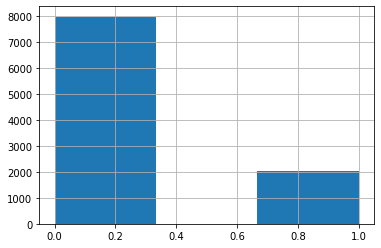

In [9]:
print(df.Exited.sum())
ax = df.Exited.hist(bins =3)

**Наблюдается значительный дисбаланс (хотя одна четверть ушедщих для банка озаначала бы, что поздно проводить анализ - пора закрывать банк). Очевидно, что он будет заметный эффект на качество модели. Тем не менее проведем обучение нескольких типов моделей и посмотрим какой показатель F1 будет достигнут.**

In [43]:
df['Exited'].value_counts(normalize=True)

0    0.7963
1    0.2037
Name: Exited, dtype: float64

**Соотношение классов с высокой точностью равно 4:1**

Модель DecisionTree:

In [50]:
for depth in range(5,15,1):
    model = DecisionTreeClassifier(random_state=54321, max_depth = depth)
    model.fit(features_train, target_train)
    predict_valid = model.predict(features_valid)
    print("depth=", depth, "F1_Score = ", f1_score(target_valid, predict_valid))

depth= 5 F1_Score =  0.48550724637681164
depth= 6 F1_Score =  0.5537459283387622
depth= 7 F1_Score =  0.5832106038291606
depth= 8 F1_Score =  0.5484351713859911
depth= 9 F1_Score =  0.5441176470588235
depth= 10 F1_Score =  0.5296671490593343
depth= 11 F1_Score =  0.5084269662921348
depth= 12 F1_Score =  0.5240641711229945
depth= 13 F1_Score =  0.5274725274725274
depth= 14 F1_Score =  0.502673796791444


In [55]:
model = DecisionTreeClassifier(random_state=54321, max_depth = 7)
model.fit(features_train, target_train)

DecisionTreeClassifier(max_depth=7, random_state=54321)

In [56]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.8245398437499999


**При глубине дерева 7 получаем максимум f1_score: 0.583, AUC-ROC: 0.824**

Модель RandomForest

In [48]:
f1_score_max=0
for est in range(50, 90, 5):
    for depth in range(1,15):
        model = RandomForestClassifier(random_state=54321, n_estimators = est, max_depth=depth)
        model.fit(features_train, target_train)
        predict_valid = model.predict(features_valid)
        if f1_score(target_valid, predict_valid) > f1_score_max:
            f1_score_max = f1_score(target_valid, predict_valid)
            est_max=est
            depth_max = depth
print("est=", est_max, "depth=", depth_max,"F1_Score = ", f1_score_max)

est= 80 depth= 12 F1_Score =  0.5755627009646302


In [89]:
model = RandomForestClassifier(random_state=54321, n_estimators = 80, max_depth=12)
model.fit(features_train, target_train)

RandomForestClassifier(max_depth=12, n_estimators=80, random_state=54321)

In [90]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.855875


**При множестве решающих деревьев 80 и глубине 12 получаем 0.575, AUC-ROC: 0.856**

Модель LogisticRegression:

In [59]:
model = LogisticRegression(random_state=54321)
model.fit(features_train, target_train)
predict_valid = model.predict(features_valid)
print("F1_Score = ", f1_score(target_valid, predict_valid))

F1_Score =  0.3013698630136986


In [60]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.7810515624999999


**F1_score: 0.3, AUC-ROC: 0.781**

## Борьба с дисбалансом

**Как уже было отмечено, в данных наблюдается большой дисбаланс классов. Применим разные методики для их уравнивания и посмотрим как это повлияет на качество модели.**

Начнем с варианта upsample (то есть увеличения числа элементов меньшого по количеству класса):

In [62]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=12345)
    return features_upsampled, target_upsampled

**Создадим набор данных с помощью функции upsample, уровняв размер классов (как мы помним они соотносились друг к другу как 4:1):**

In [93]:
features_upsampled, target_upsampled = upsample(features_train, target_train, 4)
target_upsampled.value_counts(normalize=True)

1    0.503113
0    0.496887
Name: Exited, dtype: float64

**Как мы видим баланс классов налажен**

In [83]:
for depth in range(5,15,1):
    model_1_u = DecisionTreeClassifier(random_state=54321, max_depth = depth)
    model_1_u.fit(features_upsampled, target_upsampled )
    predict_valid = model_1_u.predict(features_valid)
    print("depth=", depth,"F1_Score = ", f1_score(target_valid, predict_valid))

depth= 5 F1_Score =  0.5448504983388703
depth= 6 F1_Score =  0.5512489233419466
depth= 7 F1_Score =  0.5541706615532119
depth= 8 F1_Score =  0.559498956158664
depth= 9 F1_Score =  0.5414480587618048
depth= 10 F1_Score =  0.534446764091858
depth= 11 F1_Score =  0.5254054054054054
depth= 12 F1_Score =  0.5198711063372718
depth= 13 F1_Score =  0.5113636363636364
depth= 14 F1_Score =  0.5011655011655012


In [85]:
model_1_u = DecisionTreeClassifier(random_state=54321, max_depth = 8)
model_1_u.fit(features_upsampled, target_upsampled )
probabilities_valid = model_1_u.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.80518359375


**Методом подбора получаем, что при увелчиении меньшей выборки мы получаем снижение показателя f1-score - 0.559 vs 0.583, значение  AUC-ROC  также снизилось - 0.805 было 0.824**

In [86]:
f1_score_max=0
for est in range(50, 90, 5):
    for depth in range(1,15):
        model_2_u = RandomForestClassifier(random_state=54321, n_estimators = est, max_depth=depth)
        model_2_u.fit(features_upsampled, target_upsampled)
        predict_valid = model_2_u.predict(features_valid)
        if f1_score(target_valid, predict_valid) > f1_score_max:
            f1_score_max = f1_score(target_valid, predict_valid)
            est_max=est
            depth_max = depth
print("est=", est_max, "depth=", depth_max,"F1_Score = ", f1_score_max)

est= 80 depth= 14 F1_Score =  0.6288659793814433


In [88]:
model_2_u = RandomForestClassifier(random_state=54321, n_estimators = 80, max_depth=14)
model_2_u.fit(features_upsampled, target_upsampled )
probabilities_valid = model_2_u.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.8525757812499999


**При 80 деревьях и глубине 14 метрика 0.628. Различимый рост. Значение AUC-ROC почти не изменилось 0.853, было 0.855**

In [91]:
model = LogisticRegression(random_state=54321)
model.fit(features_upsampled, target_upsampled )
predict_valid = model.predict(features_valid)
print("F1_Score = ", f1_score(target_valid, predict_valid))

F1_Score =  0.5139372822299653


In [92]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.785159375


**В случае с логистической регрессией значительный рост обоих показателей**

**Логистическая регрессия показывает по прежнему парадоксально низкий результат**

**Следующий вариант - уменьшение большого класса - downsample:**

In [97]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    return features_downsampled, target_downsampled

**проводим уменьшение большого класса и проверяем полученный баланс:**

In [98]:
features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)
target_downsampled.value_counts(normalize=True)

1    0.503113
0    0.496887
Name: Exited, dtype: float64

In [100]:
for depth in range(5,15,1):
    model_2_d = DecisionTreeClassifier(random_state=54321, max_depth = depth)
    model_2_d.fit(features_downsampled, target_downsampled)
    predict_valid = model_2_d.predict(features_valid)
    print("depth=", depth,"F1_Score = ", f1_score(target_valid, predict_valid))

depth= 5 F1_Score =  0.5292207792207791
depth= 6 F1_Score =  0.5487179487179488
depth= 7 F1_Score =  0.5488029465930018
depth= 8 F1_Score =  0.5237683664649957
depth= 9 F1_Score =  0.5469767441860465
depth= 10 F1_Score =  0.5067567567567567
depth= 11 F1_Score =  0.5117967332123412
depth= 12 F1_Score =  0.49739130434782614
depth= 13 F1_Score =  0.4885764499121265
depth= 14 F1_Score =  0.4866785079928952


In [101]:
model_2_d = DecisionTreeClassifier(random_state=54321, max_depth = 6)
model_2_d.fit(features_downsampled, target_downsampled)
probabilities_valid = model_2_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.833840625


**При уменьшении в 4 раза большого класса и подборе глубины дерева получаем достойные f1_score: 0.548 при глубине 6 и 7, значение AUC_ROC = 0.833**

In [102]:
f1_score_max=0
for est in range(50, 90, 5):
    for depth in range(1,15):
        model_2_d = RandomForestClassifier(random_state=54321, n_estimators = est, max_depth=depth)
        model_2_d.fit(features_downsampled, target_downsampled)
        predict_valid = model_2_d.predict(features_valid)
        if f1_score(target_valid, predict_valid) > f1_score_max:
            f1_score_max = f1_score(target_valid, predict_valid)
            est_max=est
            depth_max = depth
print("est=", est_max, "depth=", depth_max,"F1_Score = ", f1_score_max)

est= 75 depth= 9 F1_Score =  0.5941747572815534


In [103]:
model_2_d = RandomForestClassifier(random_state=54321, n_estimators = 75, max_depth=9)
model_2_d.fit(features_downsampled, target_downsampled )
probabilities_valid = model_2_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.8620156250000001


**Достигнут результат 0.594 при  числе  деревьев 75 и глубине 9, AUC_ROC - 0.86** 

In [104]:
model_2_d = LogisticRegression(random_state=54321)
model_2_d.fit(features_downsampled, target_downsampled)
predict_valid = model_2_d.predict(features_valid)
print("F1_Score = ", f1_score(target_valid, predict_valid))
probabilities_valid = model_2_d.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print("AUC_ROC=", auc_roc)

F1_Score =  0.5017241379310344
AUC_ROC= 0.7843046875


Лучшие показатели существенно хуже других моделей

**Соберем данные в таблички, чтобы как-то систематизировать результаты проведенных исследований:**

In [106]:
#df = pd.read_excel('book.xlsx')
#df.drop(['Unnamed: 0'], axis=1)

,Type,original,original.1,upsample,upsample.1,downsample,downsample.1
0,parametr ->,F1_score,AUC-ROC,F1_score,AUC-ROC,F1_score,AUC-ROC
1,DecisionTreeClassifier,0.583,0.824,0.559,0.805,0.548,0.833
2,RandomForestClassifier,0.575,0.856,0.628,0.852,0.594,0.862
3,LogisticRegression,0.301,0.781,0.514,0.785,0.501,0.784


**На основе этих опытом, можно сделать вывод, что как увеличение меньшего класса, так и уменьшение большого могут дать положительный результат и повысить качество модели. Наилучшей моделью можно признать случайный лес с увеличением класса, 80 деревьях и глубиной 14.**

## Тестирование модели

**Проведем тестирование модели на тестовой выборке (которая не использовалась при валидации и обучении модели). Сперва возьмем нужную модель, с нужными параметрами и проверим, что это она.**

In [110]:
model_2_u = RandomForestClassifier(random_state=54321, n_estimators = 80, max_depth=14)
model_2_u.fit(features_upsampled, target_upsampled )
predict_valid = model_2_u.predict(features_valid)
print("F1_Score = ", f1_score(target_valid, predict_valid))

F1_Score =  0.6288659793814433


**Теперь переобучим модель с данными гиперпараметрами, используя больший набор данных - а именно объединнунную обучающую и валидирующую выборк**

In [26]:
# Код ревьюера
model_2_d

RandomForestClassifier(n_estimators=85, random_state=54321)

In [114]:
features_full_train = pd.concat([features_train, features_valid])
target_full_train = pd.concat([target_train, target_valid])
features_upsampled, target_upsampled = upsample(features_full_train, target_full_train, 4)

In [121]:
model_2_u = RandomForestClassifier(random_state=54321, n_estimators = 80, max_depth=14)
model_2_u.fit(features_upsampled, target_upsampled )
predict_test = model_2_u.predict(features_test)
print("F1_Score = ", f1_score(target_test, predict_test))

F1_Score =  0.634032634032634


**Результат более чем достойный и соответствует требуемым в задании значениям**

**Рассмотрим метрику AUC-ROC и поведение ROC кривой**

In [124]:
probabilities_test = model_2_u.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
print("AUC_ROC=", auc_roc)

AUC_ROC= 0.8612063492063492


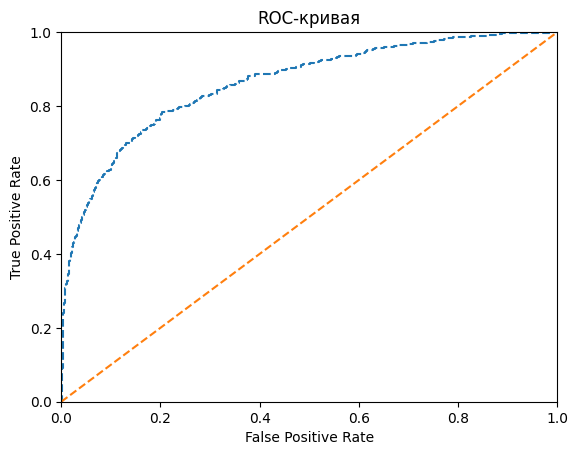

In [125]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test ) 
plt.figure()
plt.plot(fpr, tpr, linestyle='--')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC-кривая")
plt.show()

**На основании вида ROC-кривой можно сделать вывод что модель дает хорошие показатели в предсказании.  С учетом того, что задача в предсказании вероятности ухода клиента из банка, то для коммуникации с клиентами из рисковой зоны стоит выбирать порог с максимизацией TPR - то есть максимум recall показателя, а в случае экономических оценок - мксимизацией precision.**

## Вывод

**В ходе этой работы были изучены исторические данные о взаимодййствии банка и клиентов, включающие информацию об уходе клиентов из банка. Была поставлена задача спрогнозировать возможность ухода клиенты из банка исходя из имеющихся данных. Предоставленные данные были загружены и подготовлены для обучения моделей, а именно: категориальные данные были разбиты на колонки с численными значениями (флагами), были отброшены не информатиыные (для обучения моделей) колонки. Проведена стандартизация численных значений. После чего данные были разбиты на целевые и предсказательные и было проведено обучение моделей трех типов, с целей подбора оптимальных гиперпараметров и выбора наилучшей модели. Такое же исследование было проведено с данными после операции балансировки классов - увеличения меньшего класса и уменьшения большого. В результате была выбрана наилучшая модель и ее гиперпараметры. Выбор осуществлялся по максимизации метрики F1_score (среднее гармоническое полноты и точности). Также качество модели оценивалось построением ROC кривой - с ее помощью можно выбрать порог для приоритизации полноты или точности предсказания модели. 
Полученный показатель F1_Score =  0.634. А значени показателя AUC-ROC= 0.861 говорит, что наша модель существенно лучше случайной.
Итак, поставленная задача в целом решена - найдена модель, которая позволит выявить "группу" риска среди клиентов банка и провести упреждающие действия для снижения риска их потери.**
